# Quantum 2D solver checker

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pickle

quantum

In [2]:
from QML.main import ed, quantum_util
from QML.tools import quantum

initialization

In [3]:
nk = 40
nG = 11
kx = np.linspace(0, np.pi, nk)
kxx, kyy = np.meshgrid(kx, kx, indexing='ij')   # !!!
X = np.linspace(0, 1, nG)
xx, yy = np.meshgrid(X, X)

## Random potential

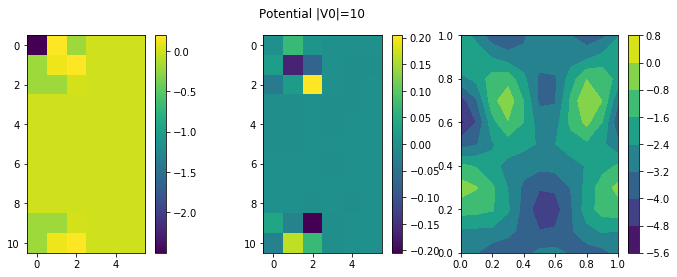

In [4]:
nx, ny = 3, 3
Vq_2D = quantum.Vextq_2D(nx, ny, nG, 5)
Vx_2D = np.fft.irfft2(Vq_2D, (nG, nG))*nG**2
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
img1 = ax1.imshow(Vq_2D.real)
plt.colorbar(img1, ax=ax1)
img2 = ax2.imshow(Vq_2D.imag)
plt.colorbar(img2, ax=ax2)
cont = ax3.contourf(xx, yy, Vx_2D)
plt.colorbar(cont, ax=ax3)
plt.suptitle('Potential |V0|=10')
plt.show()

## Hamiltonian

In [15]:
from importlib import reload
reload(ed)

<module 'QML.main.ed' from '/Users/hongbinren/anaconda2/envs/py36/lib/python3.6/site-packages/QML/main/ed.py'>

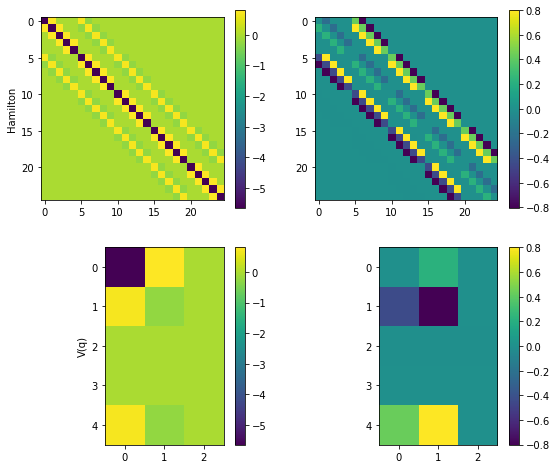

In [5]:
kx_, ky_ = 0, 0
nG = 5
Vq_2D = quantum.Vextq_2D(2, 2, nG, 10)
V = ed.hamilton_operator_G_2D(kx_, ky_, nG, Vq_2D, 0)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(9, 8))
img1 = ax1.imshow(V.real)
ax1.set_ylabel('Hamilton')
plt.colorbar(img1, ax=ax1)
img2 = ax2.imshow(V.imag)
plt.colorbar(img2, ax=ax2)
img3 = ax3.imshow(Vq_2D.real)
ax3.set_ylabel('V(q)')
plt.colorbar(img3, ax=ax3)
img4 = ax4.imshow(Vq_2D.imag)
plt.colorbar(img4, ax=ax4)
plt.show()

## Band structure

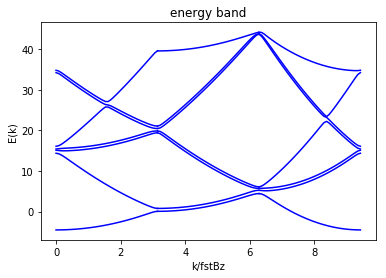

In [6]:
kpoints = list(zip(kxx.flatten(), kyy.flatten()))
nG = 11
Vq_2D = quantum.Vextq_2D(4, 3, nG, 10)
en_band_2D, uq = ed.solver2D(kpoints, nG, Vq_2D)
en_band = en_band_2D.reshape((nk, nk, nG**2))

OX = en_band[:, 0, :]
XG = en_band[-1, :, :]
GO = en_band[::-1, ::-1]
for i in range(7):
    plt.plot(kx, OX[:, i], 'b')
    plt.plot(np.pi+kx, XG[:, i], 'b')
    plt.plot(np.pi*2+kx, np.diag(GO[:, :, i]), 'b')
plt.xlabel('k/fstBz')
plt.ylabel('E(k)')
plt.title('energy band')
plt.show()

### Near free electron approximation

In [7]:
kpoints = list(zip(kxx.flatten(), kyy.flatten()))
nG = 11
Vq_2D = quantum.Vextq_2D(4, 3, nG, 5)
en_band_2D, uq = ed.solver2D(kpoints, nG, Vq_2D)
en_band = en_band_2D.reshape((nk, nk, nG**2))

gap = en_band[0, :, 1].min() - en_band[0, :, 0].max()
print(gap)

0.3247382640838623


In [8]:
2*np.linalg.norm(Vq_2D[0, 1])

0.33028465509414673

## Kinetic energy
$$T=\sum_{k}\frac{k^2}{2}\Theta(E_F-E_k)=\frac{1}{\Delta\vec{k}}\int_0^{k_F}d^2k\frac{k^2}{2}$$
This leads to:
$$\epsilon_k=\frac{\pi k_F^4}{4\times(2\pi)^2}$$
Since:
$$n=\frac{\pi k_F^2}{(2\pi)^2}$$
we obtain:
$$\epsilon_k=\pi n^2$$

In [9]:
kpoints = list(zip(kxx.flatten(), kyy.flatten()))
nG = 11
dmu = 50
Vq_2D = quantum.Vextq_2D(4, 3, nG, 0)
en_band_2D, uq_2D = ed.solver2D(kpoints, nG, Vq_2D)
en_band = en_band_2D.reshape((nk, nk, nG**2))
uq = uq_2D.reshape((nk, nk, nG**2, nG**2))
mu = en_band[:, :, 0].min() + dmu
Ek = quantum_util.kinetic_en2D(nk, nG, mu, en_band, uq)
densG = quantum_util.density2D(nk, nG, mu, en_band, uq)

Ek_tf = np.pi*densG[0, 0]**2
print(Ek_tf)
print(Ek)

199.43161995712043
199.4908714021273


## Electron density

In [52]:
from importlib import reload
reload(quantum_util)
reload(ed)

<module 'QML.main.ed' from '/Users/hongbinren/anaconda2/envs/py36/lib/python3.6/site-packages/QML/main/ed.py'>

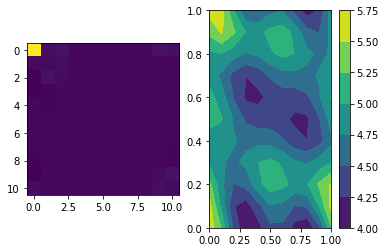

In [10]:
kpoints = list(zip(kxx.flatten(), kyy.flatten()))
nG = 11
dmu = 30
Vq_2D = quantum.Vextq_2D(4, 3, nG, 20)
en_band_2D, uq_2D = ed.solver2D(kpoints, nG, Vq_2D)
en_band = en_band_2D.reshape((nk, nk, nG**2))
uq = uq_2D.reshape((nk, nk, nG**2, nG**2))
mu = en_band[:, :, 0].min() + dmu
Ek = quantum_util.kinetic_en2D(nk, nG, mu, en_band, uq)
densG = quantum_util.density2D(nk, nG, mu, en_band, uq)
densX = np.fft.ifft2(densG)*nG**2

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(densG)
cont = ax2.contourf(xx, yy, densX)
plt.colorbar(cont, ax=ax2)
plt.show()